In [1]:
# when you change the code of .py document in the ecolab package, you have to restart the kernel of jupyter notebook and 
# run the below import code again to make sure the newest change involved.

import numpy as np
import numba
from ecolab import run_ecolab
from ecolab.environment import Environment
from ecolab.agents import Rabbit, RHD_Status
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# create the environment
env = Environment(shape = [10,10])

In [3]:
def generate_agents(Total_agents = 100, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1):
    ''' A function to output agents based on user defined variables
    Total_agents - Total number of agents
    prop_infants - Proportion of infants based on total agents
    prop_adults - Proportion of adults based on total agents
    prop_infected - Proportion of infected adults based on total number of adults
    Output: a list of agents'''
    
    N_infants = round(prop_infants*Total_agents)
    N_sus_adults = round(prop_adults*(Total_agents-N_infants))
    N_infected_adults = round(prop_infected*prop_adults*Total_agents)
    agents = []
    
    for i in range(N_infants):
        infant = Rabbit(age = np.random.randint(0,90), position = env.get_random_location()) ## age < 90 => infants
        agents.append(infant)
    for i in range(N_sus_adults):
        adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location())
        agents.append(adult)
    for i in range(N_infected_adults):
        infected_adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location(), infected=True)
        agents.append(infected_adult)
        
    return agents

In [4]:
def batch_simulation(Total_agents=100, prop_infants=0.1, prop_adults=0.9, prop_infected=0.1, num_model_runs=10):
    ''' A function to run the ecolab simulation several times to account for stochasticity
    It outputs the mean, standard deviation, and confidence interval of the proportion of infected rabbits '''
    
    batch_mean_infected = []
    
    for i in range(num_model_runs):
        agents = generate_agents(Total_agents=Total_agents, prop_infants=prop_infants,prop_adults=prop_adults,prop_infected=prop_infected)
        record, sus, infected, immune, total, infant, agents = run_ecolab(env, agents, Niteration=[0, 365], max_density = 10)
        batch_prop_infected = np.divide(infected, total)
        batch_mean_infected.append(batch_prop_infected)
    
    return batch_mean_infected

In [5]:
def average_arrays(arr, runs=10):
    ''' A function to average the time series array by the number of simulation runs'''
    
    avg_array = (arr[0] + arr[1] + arr[2] + arr[3] + arr[4] + arr[5] + arr[6] + arr[7] + arr[8] + arr[9])/runs
    
    return avg_array

In [6]:
def summary_statistics(arr):
    ''' A function to output various summary statistics. The input is the averaged array'''
    mean = np.mean(arr)
    std = np.std(arr)
    ci_low = mean - (1.96 * std / sqrt(len(arr)))
    ci_high = mean + (1.96 * std / sqrt(len(arr)))
    
    return mean, std, ci_low, ci_high

In [7]:
batch_mean_infected_25 = batch_simulation(Total_agents = 25, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10)
ave_array_25 = average_arrays(batch_mean_infected_25)
mean_25, std_25, ci_low_25, ci_high_25 = summary_statistics(ave_array_25)
print(f'The mean proportion of infected rabbits under an initialised population of 25 is: {mean_25:.4f}')
print(f'The standard deviation is: {std_25:.4f}')
print(f'It follows that the 95% confidence intervals are: {ci_low_25:.4f} and {ci_high_25:.4f}')

The running time of experiment: 12 seconds.
The running time of experiment: 5 seconds.
The running time of experiment: 7 seconds.
The running time of experiment: 5 seconds.
The running time of experiment: 5 seconds.
The running time of experiment: 6 seconds.
The running time of experiment: 5 seconds.
The running time of experiment: 6 seconds.
The running time of experiment: 6 seconds.
The running time of experiment: 6 seconds.
The mean proportion of infected rabbits under an initialised population of 25 is: 0.0447
The standard deviation is: 0.0386
It follows that the 95% confidence intervals are: 0.0408 and 0.0487


In [8]:
batch_mean_infected_50 = batch_simulation(Total_agents = 50, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10)
ave_array_50 = average_arrays(batch_mean_infected_50)
mean_50, std_50, ci_low_50, ci_high_50 = summary_statistics(ave_array_50)
print(f'The mean proportion of infected rabbits under an initialised population of 50 is: {mean_50:.4f}')
print(f'The standard deviation is: {std_50:.4f}')
print(f'It follows that the 95% confidence intervals are: {ci_low_50:.4f} and {ci_high_50:.4f}')

The running time of experiment: 23 seconds.
The running time of experiment: 16 seconds.
The running time of experiment: 24 seconds.
The running time of experiment: 19 seconds.
The running time of experiment: 20 seconds.
The running time of experiment: 16 seconds.
The running time of experiment: 16 seconds.
The running time of experiment: 13 seconds.
The running time of experiment: 23 seconds.
The running time of experiment: 19 seconds.
The mean proportion of infected rabbits under an initialised population of 50 is: 0.0540
The standard deviation is: 0.0873
It follows that the 95% confidence intervals are: 0.0451 and 0.0630


In [9]:
batch_mean_infected_100 = batch_simulation(Total_agents = 100, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10)
ave_array_100 = average_arrays(batch_mean_infected_100)
mean_100, std_100, ci_low_100, ci_high_100 = summary_statistics(ave_array_100)
print(f'The mean proportion of infected rabbits under an initialised population of 100 is: {mean_100:.4f}')
print(f'The standard deviation is: {std_100:.4f}')
print(f'It follows that the 95% confidence intervals are: {ci_low_100:.4f} and {ci_high_100:.4f}')

The running time of experiment: 70 seconds.
The running time of experiment: 65 seconds.
The running time of experiment: 44 seconds.
The running time of experiment: 338 seconds.
The running time of experiment: 74 seconds.
The running time of experiment: 63 seconds.
The running time of experiment: 79 seconds.
The running time of experiment: 60 seconds.
The running time of experiment: 78 seconds.
The running time of experiment: 75 seconds.
The mean proportion of infected rabbits under an initialised population of 100 is: 0.0600
The standard deviation is: 0.1132
It follows that the 95% confidence intervals are: 0.0484 and 0.0716


In [11]:
batch_mean_infected_200 = batch_simulation(Total_agents = 200, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10)
ave_array_200 = average_arrays(batch_mean_infected_200)
mean_200, std_200, ci_low_200, ci_high_200 = summary_statistics(ave_array_200)
print(f'The mean proportion of infected rabbits under an initialised population of 200 is: {mean_200:.4f}')
print(f'The standard deviation is: {std_200:.4f}')
print(f'It follows that the 95% confidence intervals are: {ci_low_200:.4f} and {ci_high_200:.4f}')

The running time of experiment: 125 seconds.
The running time of experiment: 125 seconds.
The running time of experiment: 120 seconds.
The running time of experiment: 123 seconds.
The running time of experiment: 125 seconds.
The running time of experiment: 103 seconds.
The running time of experiment: 74 seconds.
The running time of experiment: 76 seconds.
The running time of experiment: 76 seconds.
The running time of experiment: 70 seconds.
The mean proportion of infected rabbits under an initialised population of 200 is: 0.0565
The standard deviation is: 0.1325
It follows that the 95% confidence intervals are: 0.0429 and 0.0701


In [12]:
import scipy.stats as stats
# Test between initial population of 25 and 50
t, p = stats.ttest_ind(ave_array_25,ave_array_50, equal_var=False)
t, p

(-1.8582515527883858, 0.06371952367032294)

In [13]:
# Test between initial population of 50 and 100
t1,p1 = stats.ttest_ind(ave_array_50,ave_array_100, equal_var=False)
t1,p1

(-0.7964494270459107, 0.4260472895766695)

In [14]:
# Test between initial population of 100 and 200
t2,p2 = stats.ttest_ind(ave_array_100,ave_array_200, equal_var=False)
t2,p2

(0.3822379512333227, 0.7023991624890803)

In [15]:
# Test between initial population of 25 and 100
t3,p3 = stats.ttest_ind(ave_array_25,ave_array_100, equal_var=False)
t3,p3

(-2.4347090057788425, 0.015293660861427088)

In [16]:
# Test between initial population of 25 and 200
t4,p4 = stats.ttest_ind(ave_array_25,ave_array_200, equal_var=False)
t4,p4

(-1.6266277210281015, 0.10455688182147026)

In [17]:
# Test between initial population of 50 and 200
t5,p5 = stats.ttest_ind(ave_array_50,ave_array_200, equal_var=False)
t5,p5

(-0.29752901199945225, 0.7661607890635296)

Text(0.5, 1.0, 'Figure 1. Proportion of Infected Rabbits for Each Initial Population Size')

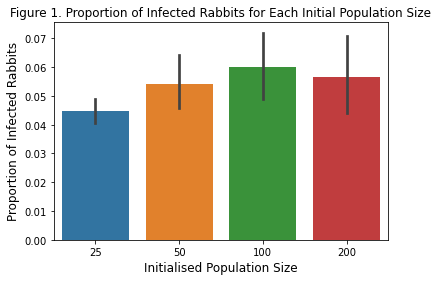

In [18]:
import seaborn as sns
xlabels = [25, 50, 100, 200]
g = sns.barplot(data = [ave_array_25, ave_array_50, ave_array_100, ave_array_200])
g.set_xticklabels(xlabels)
g.set_xlabel("Initialised Population Size", fontsize = 12)
g.set_ylabel("Proportion of Infected Rabbits", fontsize = 12)
g.set_title('Figure 1. Proportion of Infected Rabbits for Each Initial Population Size')

In [16]:
agents_25 = generate_agents(Total_agents = 25, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1)

In [17]:
record_25, sus_25, infected_25, immune_25, total_25, infant_25, agents25 = run_ecolab(env, agents_25, Niteration=[0, 365], max_density = 10)

The running time of experiment: 3 seconds.


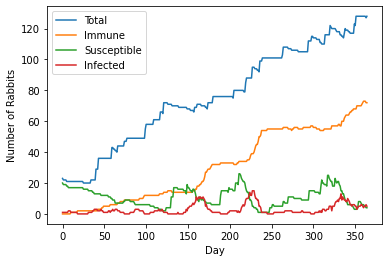

In [18]:
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(total_25, label='Total')
ax.plot(immune_25, label='Immune')
ax.plot(sus_25, label='Susceptible')
ax.plot(infected_25, label='Infected')
plt.xlabel('Day')
plt.ylabel('Number of Rabbits')
plt.savefig('time_series_25.png')
leg = ax.legend();

In [35]:
agents_200 = generate_agents(Total_agents = 200, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1)
record_200, sus_200, infected_200, immune_200, total_200, infant_200, agents200 = run_ecolab(env, agents_200, Niteration=[0, 365], max_density = 10)

The running time of experiment: 73 seconds.


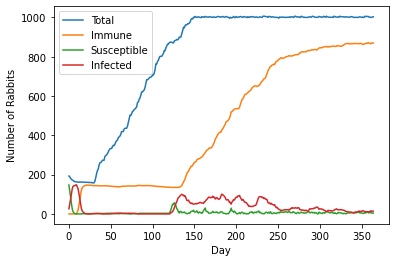

In [36]:
fig, ax = plt.subplots()
ax.plot(total_200, label='Total')
ax.plot(immune_200, label='Immune')
ax.plot(sus_200, label='Susceptible')
ax.plot(infected_200, label='Infected')
plt.xlabel('Day')
plt.ylabel('Number of Rabbits')
plt.savefig('time_series_200.png')
leg = ax.legend();

In [83]:
agents_50 = generate_agents(Total_agents = 50, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1)
record_50, sus_50, infected_50, immune_50, total_50, infant_50, agents50 = run_ecolab(env, agents_50, Niteration=[0, 365], max_density = 10)

The running time of experiment: 11 seconds.


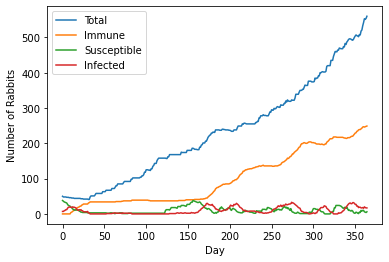

In [84]:
fig, ax = plt.subplots()
ax.plot(total_50, label='Total')
ax.plot(immune_50, label='Immune')
ax.plot(sus_50, label='Susceptible')
ax.plot(infected_50, label='Infected')
plt.xlabel('Day')
plt.ylabel('Number of Rabbits')
plt.savefig('time_series_50.png')
leg = ax.legend();

In [85]:
agents_100 = generate_agents(Total_agents = 100, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1)
record_100, sus_100, infected_100, immune_100, total_100, infant_100, agents100 = run_ecolab(env, agents_100, Niteration=[0, 365], max_density = 10)

The running time of experiment: 35 seconds.


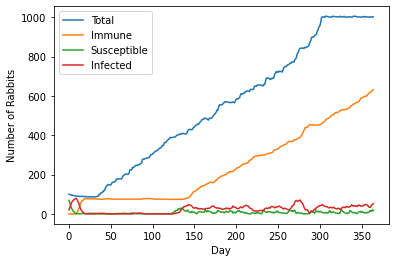

In [86]:
fig, ax = plt.subplots()
ax.plot(total_100, label='Total')
ax.plot(immune_100, label='Immune')
ax.plot(sus_100, label='Susceptible')
ax.plot(infected_100, label='Infected')
plt.xlabel('Day')
plt.ylabel('Number of Rabbits')
plt.savefig('time_series_100.png')
leg = ax.legend();

In [31]:
# Exploratory data analyis
print("The number of rabbits in the population at the end of the year when initialised at 25:", total_25[364])
print("The number of rabbits in the population at the end of the year when initialised at 200:", total_200[364])
print("The number of rabbits in the population at the end of the year when initialised at 50:", total_50[364])
print("The number of rabbits in the population at the end of the year when initialised at 100:", total_100[364])

The number of rabbits in the population at the end of the year when initialised at 25: 112
The number of rabbits in the population at the end of the year when initialised at 200: 1001
The number of rabbits in the population at the end of the year when initialised at 50: 674
The number of rabbits in the population at the end of the year when initialised at 100: 1002
